In [ ]:
FloeU = []; FloeL = [];
keep = zeros(1,length(Floe));
for ii = 1+Nb:length(Floe)
  if min(Floe(ii).c_alpha(2,:))+Floe(ii).Yi>-0.1e5 && max(Floe(ii).c_alpha(2,:))+Floe(ii).Yi<0.9e5 && min(Floe(ii).c_alpha(1,:))+Floe(ii).Xi>-0.4e5 && max(Floe(ii).c_alpha(1,:))+Floe(ii).Xi<0.4e5
    FloeU = [FloeU Floe(ii)];
    keep(ii) = 1;
  elseif min(Floe(ii).c_alpha(2,:))+Floe(ii).Yi>-1.75e5 && max(Floe(ii).c_alpha(2,:))+Floe(ii).Yi<-0.6e5 && min(Floe(ii).c_alpha(1,:))+Floe(ii).Xi>-0.4e5 && max(Floe(ii).c_alpha(1,:))+Floe(ii).Xi<0.5e5
    FloeL = [FloeL Floe(ii)];
    keep(ii) = 1;
  end
end
%create boundary polyshape
keep = logical(keep);
FloeOut = Floe(~keep);
for ii =1:length(FloeOut)
  poly(ii) = polyshape(FloeOut(ii).c_alpha'+[FloeOut(ii).Xi FloeOut(ii).Yi]);
end
boundaries = union([poly]);
x = [-4e4 -4e4 4e4 4e4 -4e4];
x_low = [-4e4 -4e4 5e4 5e4 -4e4];
y_up = [-0.1e5 0.9e5 0.9e5 -0.1e5 -0.1e5];
y_low = [-0.6e5 -1.75e5 -1.75e5 -0.6e5 -0.6e5];
upper_box = polyshape([x;y_up]');
lower_box = polyshape([x_low;y_low]');
upper_box = subtract(upper_box,boundaries);
lower_box = subtract(lower_box,boundaries);
A_upper = area(upper_box); A_lower = area(lower_box);

Areas2 = cat(1,FloeU.area); %Find areas of segmented floes
a2 = sqrt(cat(1,Areas2));
hFSD2 = histogram(a2/1e3,edges);
edges2 = hFSD2.BinEdges;
val2 = hFSD2.Values;
clear FSD2
count3 = 1;
%Loop through to find floe sizes per km^2
for ii = 1:length(val2)
    FSD2(count3) = sum(val2(ii:end))/(A_upper)*1e6;
    count3 = count3+1;
end

Areas3 = cat(1,FloeL.area); %Find areas of segmented floes
a3 = sqrt(cat(1,Areas3));
hFSD3 = histogram(a3/1e3,edges);
edges3 = hFSD3.BinEdges;
val3 = hFSD3.Values;
clear FSD3
count3 = 1;
%Loop through to find floe sizes per km^2
for ii = 1:length(val3)
    FSD3(count3) = sum(val3(ii:end))/(A_lower)*1e6;
    count3 = count3+1;
end

In [ ]:
close all
figure;
fig(1) = loglog(bins,FSD_2009_exit,'linewidth',2); hold on
fig(2) = loglog(bins,FSD_2011_exit,'linewidth',2);
fig(3) = loglog(bins,FSD3,'linewidth',2);
min_size = 1;
binsUpper = bins(bins>min_size); slopes1 = -2;
xlim([10.^-1 100])
ylim([10.^-4 1])
fig(4) = loglog([binsUpper(1) 50], 5*1e-1*[binsUpper(1) 50].^(slopes1),'k--','linewidth',2);
set(gca, 'YScale', 'log')
set(gca, 'xScale', 'log')
xlabel('Floe Size (km)','fontsize',20,'interpreter','latex')
ylabel({'FSD (floes per km$^2$)'},'fontsize',20,'interpreter','latex')
legend('Observations 2009', 'Observations 2011','Nares Exit (SubZero)','L^{-2}','fontsize',20)
legend boxoff

In [ ]:
close all
figure;
fig(1) = loglog(bins,FSD_trial,'linewidth',2); hold on
fig(2) = loglog(bins,FSD_2011_top,'linewidth',2);
fig(3) = loglog(bins,FSD2,'linewidth',2);
min_size = 1;
binsUpper = bins(bins>min_size); slopes1 = -2;
xlim([10.^-1 100])
ylim([10.^-4 1])
fig(4) = loglog([binsUpper(1) 50], 5*1e-1*[binsUpper(1) 50].^(slopes1),'k--','linewidth',2);
set(gca, 'YScale', 'log')
set(gca, 'xScale', 'log')
xlabel('Floe Size (km)','fontsize',20,'interpreter','latex')
ylabel({'FSD (floes per km$^2$)'},'fontsize',20,'interpreter','latex')
legend('Observations1', 'Observations 2011','Nares Entrance (SubZero)','L^{-2}','fontsize',20)
legend boxoff

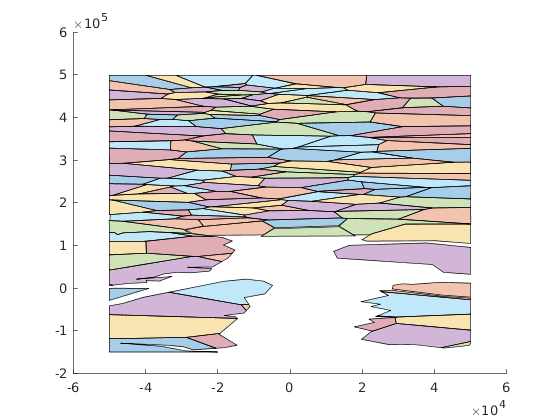

In [18]:
load( './Floes/Floe0000007.mat','Floe')
clear poly
for ii =1:length(Floe)
  poly(ii) = polyshape(Floe(ii).c_alpha'+[Floe(ii).Xi Floe(ii).Yi]);
end
plot(poly)

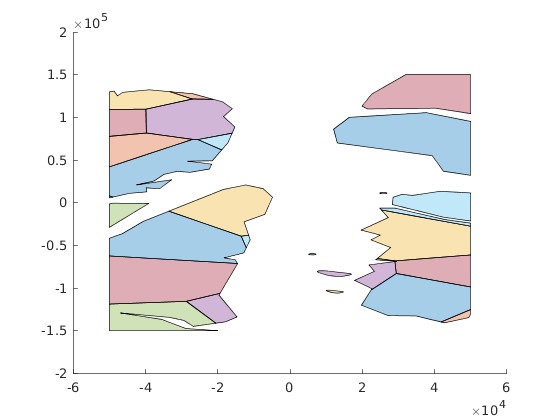

In [5]:
load( './Nares/Nares_Strait_segments','R')
plot(R)

In [ ]:
figure;
fig(1) = loglog(bins,FSD_2009_exit,'linewidth',2); hold on
fig(2) = loglog(bins,FSD_2011_exit,'linewidth',2);
fig(3) = loglog(bins,FSD3,'linewidth',2);
min_size = 1;
binsUpper = bins(bins>min_size); slopes1 = -2;
xlim([10.^-1 100])
ylim([10.^-4 1])
fig(4) = loglog([binsUpper(1) 50], 5*1e-1*[binsUpper(1) 50].^(slopes1),'k--','linewidth',2);
set(gca, 'YScale', 'log')
set(gca, 'xScale', 'log')
xlabel('Floe Size (km)','fontsize',20,'interpreter','latex')
ylabel({'FSD (floes per km$^2$)'},'fontsize',20,'interpreter','latex')
legend('Observations 2009', 'Observations 2011','Nares Exit (SubZero)','L^{-2}','fontsize',20)
legend boxoff

> In path (line 109)
  In addpath (line 86)
  In paths (line 8)


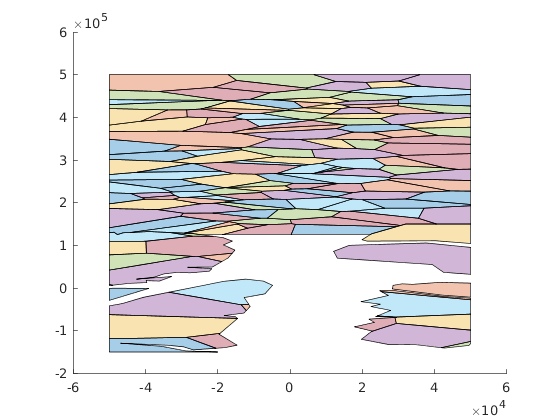

In [17]:
close all; clear all;
set(0, 'DefaultFigureRenderer', 'painters');
paths
%% Set Flags
ISLANDS = false;

SIMPLIFY = false;

RIDGING=false; 

FRACTURES=false;

PERIODIC=false;

PACKING = false;

WELDING = false;

CORNERS = false;

COLLISION = true;

AVERAGE = false; %average certain values in time

RAFTING = false;

KEEP_MIN = true; %Retain floes in simulation that get smaller set threshold

ifPlot = true; %Plot floe figures or not?

ifPlotStress = false; %Plot floe figures with floes shaded by stress values

ifPlotStressStrain = false; %Create plot with homogenized stress and strain values

justfrac = false;

%% Initialize model vars

dt=10; %Time step in sec
height.mean = 1; %mean value of thickness for initial floes
height.delta = 0; %maximum deviation about the mean thickness if a distribution is desired


nDTpack = 500; %Time streps between creation of new floes
rho_ice=920; % kg/m3
[ocean, HFo, h0]=initialize_ocean_Nares(dt,nDTpack); %Define ocean currents

%Define Atmospheric winds
winds.x = ocean.Xocn; winds.y = ocean.Yocn;
U0 = 0; V0 = -10;
winds.u=U0*ones(size(ocean.Xocn));
winds.v=V0*ones(size(ocean.Xocn));

%Define boundaries
c2_boundary=initialize_boundaries_Nares();
f=2*pi/(24*3600);
Ly = max(c2_boundary(2,:));Lx = max(c2_boundary(1,:));
min_floe_size = 4*Lx*Ly/10000; %set minimum floe size for initialization
y_low = c2_boundary(2,:);
y_low(2) =-1e5;  y_low(3) =-1e5;
poly_low = polyshape([c2_boundary(1,:); y_low]');

%Initialize Floe state
target_concentration = [1; 0]; %Set target concentration for initial conditions
[Floe, Nb] = initial_concentration_Nares(c2_boundary,target_concentration,height,50,min_floe_size,ISLANDS);
plot([Floe.poly])

In [ ]:
1